In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [2]:
import os
import sys

# set default path
default_path = 'C:/Users/dell'

# Change the current working directory
os.chdir(default_path)

# Save the CSV file to the default path
#df.to_csv('submit.csv', index=False)

In [6]:
# Load DataFrame
df = pd.read_csv("2010_2022_All_Country_by_statistic_code_export.csv")
df = df.rename(columns={'HS Code':'HSCode'})
#Convert HScode to String
df['HSCode'] = df['HSCode'].astype(str)

# Filter rows where HScode starts with 2203-2208
filtered_df = df[df['HSCode'].str.startswith(('2203', '2204', '2205', '2206', '2207', '2208'))]

# Print the filtered DataFrame
display(filtered_df)
country_code = pd.read_csv('country_code_name.csv')

,Year,Month,Type,Country,HSCode,Statistic Code,Unit Code,Description,Monthly_Quantity,Monthly_FOB(BAHT),Qty_ByMonth_YearAgo_TilNow,FOB(BAHT)_ByMonth_YearAgo_TilNow
1249,2565,1,2,KH,22030011,0,LTR,Of an alcoholic strength by volume not exceedi...,45579,3957040,45579,3957040
1250,2565,1,2,KH,22030019,0,LTR,Other (LTR),186078,17193416,186078,17193416
1251,2565,1,2,AE,22030091,0,LTR,Of an alcoholic strength by volume not exceedi...,9367795,230163207,9367795,230163207
1252,2565,1,2,AE,22030099,0,LTR,Other (LTR),1943563,57861025,1943563,57861025
1253,2565,1,2,AE,22041000,1,LTR,Champagne (LTR),1577,4442476,1577,4442476
...,...,...,...,...,...,...,...,...,...,...,...,...
1577232,2553,12,2,CN,22087010,0,LTR,Of an alcoholic strength by volume not exceedi...,1778,650398,43996,15320299
1577233,2553,12,2,GB,22089010,0,LTR,Medicated samsu of an alcoholic strength by vo...,25145,2234286,414664,34342886
1577234,2553,12,2,KR,22089030,0,LTR,Other samsu of an alcoholic strength by volume...,0,0,34576,997166
1577235,2553,12,2,MM,22089080,0,LTR,Bitters and similar beverages of an alcoholic ...,0,0,4993,1662390


In [7]:
#Quantity export trends over time
df_a = filtered_df.groupby(['Year','Month'])[['Monthly_Quantity']].agg('sum')
df_a = df_a.reset_index()
df_a['Month'] = df_a['Month'].astype(str).str.zfill(2)
df_a['Year'] = df_a['Year'] - 543
df_a['Datetime'] = pd.to_datetime(df_a['Year'].astype(str) + df_a['Month'].astype(str) + '01', format='%Y%m%d')

fig = px.line(df_a,x="Datetime", y="Monthly_Quantity", title='Monthly_Quantity trends')
fig.show()


#Min-Max ของแต่ละปี

In [8]:
#percentage change rate compare to previous year
df_b = filtered_df.groupby(['Year'])['Monthly_Quantity'].agg('sum').reset_index()
df_b['pct_change'] = df_b['Monthly_Quantity'].pct_change()
df_b['pct_change'] = df_b['pct_change'] *100
df_b['Year'] = df_b['Year']-543
df_b

,Year,Monthly_Quantity,pct_change
0,2010,184170878,NaN
1,2011,306386215,66.359752
2,2012,816769501,166.581674
3,2013,381867402,-53.246613
4,2014,313840154,-17.814364
5,2015,319741248,1.880286
6,2016,324177214,1.387361
7,2017,285286843,-11.996639
8,2018,236488281,-17.105087
9,2019,211378689,-10.617690


In [9]:
#Mean of percentage change rate
df_b['pct_change'].mean()

8.926821459704911

In [10]:
#Top 5 Countries most export
df_c = filtered_df.groupby('Country')[['Monthly_Quantity']].agg('sum')
df_c = df_c.sort_values('Monthly_Quantity',ascending=False).reset_index()
df_c = df_c.merge(country_code[['name','alpha-2']], how='inner', left_on='Country',right_on='alpha-2')
display(df_c[['name','Monthly_Quantity']].head())

,name,Monthly_Quantity
0,United Arab Emirates,2877347977
1,China,253241095
2,Australia,251089406
3,Japan,111820120
4,Switzerland,59133953


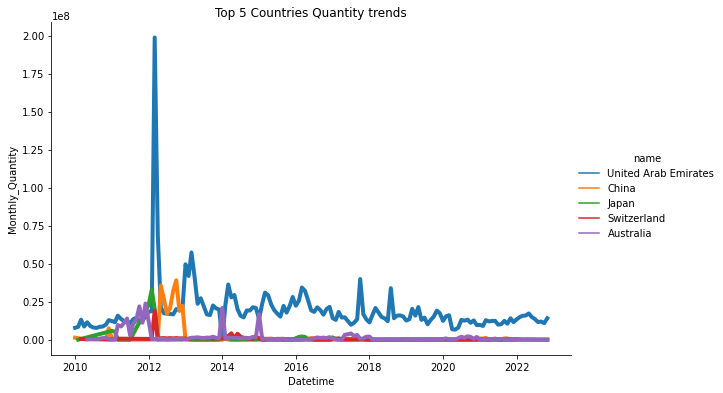

In [24]:
#Top 5 Countries export quantity trends
top_country = [country for country in df_c['Country'].head(5)]
df_c1 = filtered_df.loc[df['Country'].isin(top_country)]
df_c1 = df_c1.groupby(['Year','Month','Country'])[['Monthly_Quantity']].agg('sum').reset_index()
df_c1['Month'] = df_c1['Month'].astype(str).str.zfill(2)
df_c1['Year'] = df_c1['Year'] - 543
df_c1['Datetime'] = pd.to_datetime(df_c1['Year'].astype(str) + df_c1['Month'].astype(str) + '01', format='%Y%m%d')
df_c1 = df_c1.merge(country_code[['name','alpha-2']], how='inner', left_on='Country',right_on='alpha-2')
import seaborn as sns

sns.relplot(data=df_c1, kind="line",x="Datetime", y="Monthly_Quantity",
            height=5.5, aspect=1.5, linewidth=4,sort=False,hue='name').set(title=f'Top 5 Countries Quantity trends')

#make an interactive plot from plotly
fig = px.line(df_c1,x="Datetime", y="Monthly_Quantity", color='name', title='Top 5 Countries Quantity trends')
fig.show()



In [25]:
#Australia trends
Emirates = filtered_df[filtered_df['Country']=='AE']
Emirates = Emirates.groupby('Year')[['Monthly_Quantity']].agg('sum').reset_index()
Emirates['Year'] = Emirates['Year']-543
Emirates['pct_change'] = Emirates['Monthly_Quantity'].pct_change() *100
display(Emirates)

fig = px.bar(Emirates, x='Year', y='Monthly_Quantity',
             hover_data=['Year', 'Monthly_Quantity'], color='Year',text='pct_change',
             labels={'Monthly_Quantity':'Export Quaintity (LTR)'})
z = '%{text:.2s}'
fig.update_traces( texttemplate=f'{z}%',textposition='outside',textfont_size=13)
fig.update_layout(xaxis_tickangle=-15,height=500,width=1100,title='Export Quantity of United Arab Emirates',uniformtext_minsize=0.1, uniformtext_mode='hide')
fig.show()

,Year,Monthly_Quantity,pct_change
0,2010,114071060,NaN
1,2011,155412808,36.242100
2,2012,452791992,191.347925
3,2013,358805652,-20.757068
4,2014,247752742,-30.950714
5,2015,262768703,6.060866
6,2016,276964610,5.402434
7,2017,191465820,-30.869933
8,2018,202738922,5.887788
9,2019,186081364,-8.216261


In [26]:
#filtered = pd.read_csv('filtered.csv')
df_d = filtered_df.groupby(['Year','Description'])[['Monthly_Quantity']].agg('sum')
df_d = df_d.sort_values(['Year','Monthly_Quantity'],ascending=[True,False])
df_d.reset_index(inplace=True)
df_d['Year'] = df_d['Year'] - 543
df_d1 = df_d.loc[(df_d['Year'] >= 2010) & (df_d['Year'] <= 2016)]
df_d2 = df_d.loc[(df_d['Year'] > 2016)]

In [63]:
#Top export alcohol product in 2010-2016
top1 = df_d1.groupby('Description')[['Monthly_Quantity']].agg('sum')
top1 = top1.sort_values('Monthly_Quantity',ascending=False)
top1.head(10)

#plot top 10 export alcohol product in 2010-2016
fig = px.bar(top1.head(10), x=top1.head(10).index, y='Monthly_Quantity',
                hover_data=['Monthly_Quantity'], color=top1.head(10).index,text='Monthly_Quantity',
                labels={'Monthly_Quantity':'Export Quantity (LTR)'})
z = '%{text:.2s}'
fig.update_traces( texttemplate=f'{z}%',textposition='outside',textfont_size=10)
fig.update_layout(xaxis_tickfont_size=9,xaxis_tickangle=-55, yaxis_tickfont_size=9,height=800,width=1500,title='Top 10 Export Alcohol Product in 2017-2022', title_x=0.5 ,uniformtext_minsize=0.1, uniformtext_mode='hide', font=dict(size=9))
fig.show()

In [62]:
import matplotlib.pyplot as plt
#Top export alcohol product in 2017-2022
top2 = df_d1.groupby('Description')[['Monthly_Quantity']].agg('sum')
top2 = top2.sort_values('Monthly_Quantity',ascending=False)
top2.head(10)

#plot top 10 export alcohol product in 2017-2022
fig = px.bar(top2.head(10), x=top2.head(10).index, y='Monthly_Quantity',
                hover_data=['Monthly_Quantity'], color=top2.head(10).index,text='Monthly_Quantity',
                labels={'Monthly_Quantity':'Export Quantity (LTR)'}
                )
z = '%{text:.2s}'
fig.update_traces( texttemplate=f'{z}%',textposition='outside',textfont_size=10)
fig.update_layout(xaxis_tickfont_size=9,xaxis_tickangle=-55, yaxis_tickfont_size=9,height=800,width=1500,title='Top 10 Export Alcohol Product in 2017-2022', title_x=0.5 ,uniformtext_minsize=0.1, uniformtext_mode='hide', font=dict(size=9))
fig.show()


